In [ ]:
import chromadb
from chromadb.utils.data_loaders import ImageLoader
from chromadb.utils.embedding_functions import OpenCLIPEmbeddingFunction
from matplotlib.image import imread
import os
from pathlib import Path


In [ ]:
IMAGE_DIR = "Images/train_mini"
VALID_EXTENSIONS = {".jpg", ".jpeg", ".png", ".webp"}

dataset = []

for idx, img_file in enumerate(sorted(Path(IMAGE_DIR).iterdir())):
    if img_file.suffix.lower() in VALID_EXTENSIONS:
        img_id = f"img_{idx:06d}"
        img_path = str(img_file)
        dataset.append((img_id, img_path))

In [3]:
image_ids = [img_id for img_id, img_path in dataset]
image_urls = [img_path for img_id, img_path in dataset]
type(image_urls)

list

In [4]:
client = chromadb.Client()

data_loader = ImageLoader()
embedding_function = OpenCLIPEmbeddingFunction()

collection = client.create_collection(
    name='multimodal_collection',
    embedding_function=embedding_function,
    data_loader=data_loader
)

for img_id, img_path in dataset:
    # emb = encode_image(img_path)
    collection.add(ids=[img_id], uris=[img_path], metadatas=[{"path": img_path}])


/Users/m0s11a4/Documents/Sindhu/Deep learning/nl_2_image_search/venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


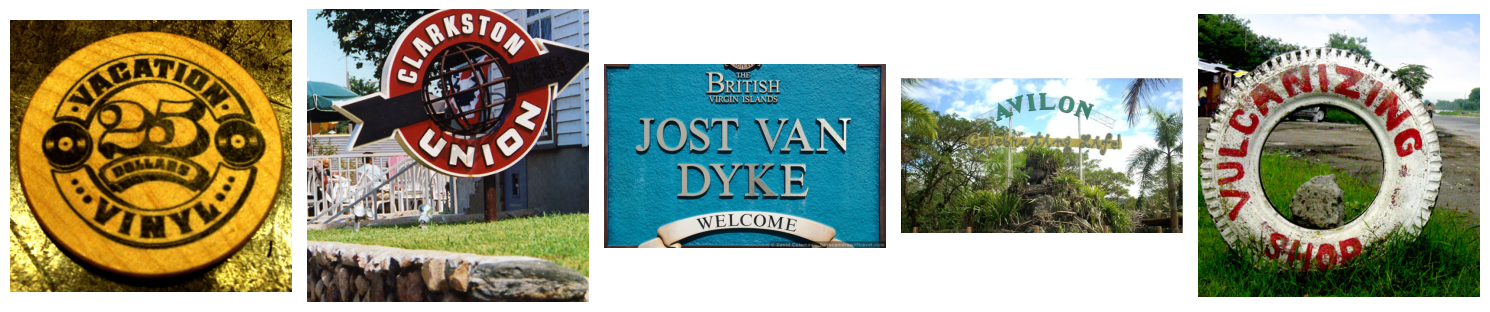

In [7]:
text_query = "vacation"

results = collection.query(
    query_texts=[text_query],
    n_results=5,
)

results['metadatas'][0]
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 5, figsize=(15, 6))
axes = axes.flatten()

for idx, metadata in enumerate(results['metadatas'][0]):
    img_path = metadata['path']
    img = imread(img_path)
    axes[idx].imshow(img)
    axes[idx].axis('off')

plt.tight_layout()
plt.show()
